In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/newsArticle.csv')
data.head()

,Headline,Source,Posted,Description,Link
0,Brussels Backs Down: Beyond Brexit,Bloomberg,· 8 hours ago,The EU has backed off a threat of imminent leg...,https://www.bloomberg.com/news/newsletters/202...
1,Brexit Britain's resilient services sector is ...,Daily Telegraph,· 1 day ago,Many people raised concerns about the patchy c...,https://www.telegraph.co.uk/news/2021/07/28/br...
2,"Has ‘Reopening’, ‘Brexit’ and ‘Tapering’ close...",MSN News,· 13 hours ago,"Pingdemic post reopening, disagreement post Br...",https://www.msn.com/en-in/money/markets/has-re...
3,The explosive Brexit spat that no one is talki...,CNN.com,· 2 days ago,Boris Johnson has spent decades agitating agai...,https://www.cnn.com/2021/07/28/business/lugano...
4,Brits abroad enjoy Brexit tax-free shopping bo...,MSN News,· 9 hours ago,Britons joining in the great escape to Europe ...,https://www.msn.com/en-gb/money/other/brits-ab...


In [ ]:
print(len(data))

335


In [ ]:
import string
def clean_txt(article):
  tokens = article.split()
  tokens = [t for t in tokens if t not in string.punctuation]
  tokens = [t for t in tokens if t.isalpha()]
  tokens = [t.lower() for t in tokens]
  return tokens

In [ ]:
articles = []
description = data['Description'] 
for i in range(len(description)):
  art = clean_txt(description[i])
  for word in art:
    articles.append(word)

In [ ]:
print(articles)

['the', 'eu', 'is', 'poised', 'to', 'steal', 'a', 'march', 'on', 'the', 'uk', 'in', 'the', 'hunt', 'for', 'a', 'trade', 'deal', 'with', 'nicola', 'sturgeon', 'believes', 'scotland', 'has', 'a', 'brighter', 'future', 'inside', 'the', 'will', 'be', 'back', 'as', 'scots', 'enter', 'a', 'may', 'vote', 'pitched', 'on', 'whether', 'there', 'should', 'be', 'a', 'second', 'independence', 'a', 'leading', 'brexiteer', 'has', 'accused', 'the', 'irish', 'government', 'of', 'using', 'threat', 'of', 'ira', 'to', 'it', 'was', 'a', 'a', 'pot', 'noodle', 'and', 'a', 'mars', 'nigel', 'farage', 'scottish', 'national', 'party', 'leader', 'nicola', 'sturgeon', 'is', 'aiming', 'to', 'win', 'a', 'majority', 'of', 'the', 'seats', 'biggest', 'party', 'was', 'set', 'for', 'its', 'first', 'ever', 'leadership', 'election', 'after', 'its', 'westminster', 'a', 'total', 'of', 'candidates', 'are', 'standing', 'for', 'mayor', 'this', 'with', 'those', 'from', 'mainstream', 'parties', 'first', 'minister', 'arlene', 'fos

In [ ]:
print('total Tokens',len(articles))
print('total Tokens',len(set(articles)))

total Tokens 11503
total Tokens 1918


In [ ]:
print(articles[0:4])

['the', 'eu', 'is', 'poised']


In [ ]:
# Creating a sequence of 5 words to predict 1 word
length = 5 + 1
seq = []

for i in range(length,len(articles)):
  sequence = articles[i-length:i]
  lines = ' '.join(sequence)
  seq.append(lines)
print('Total Sequence',len(seq))


Total Sequence 11497


In [ ]:
print(seq[0])

the eu is poised to steal


In [ ]:
print(len(seq))

11497


In [ ]:
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(seq)
tokens = tokenizer.texts_to_sequences(seq)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1919


In [ ]:
print(len(tokens))
print(tokens[0])
print(tokens[-1])
print(tokens)

11497
[1, 71, 18, 1918, 3, 900]
[24, 1917, 301, 40, 439, 7]
[[1, 71, 18, 1918, 3, 900], [71, 18, 1918, 3, 900, 5], [18, 1918, 3, 900, 5, 232], [1918, 3, 900, 5, 232, 7], [3, 900, 5, 232, 7, 1], [900, 5, 232, 7, 1, 51], [5, 232, 7, 1, 51, 6], [232, 7, 1, 51, 6, 1], [7, 1, 51, 6, 1, 901], [1, 51, 6, 1, 901, 10], [51, 6, 1, 901, 10, 5], [6, 1, 901, 10, 5, 12], [1, 901, 10, 5, 12, 22], [901, 10, 5, 12, 22, 23], [10, 5, 12, 22, 23, 184], [5, 12, 22, 23, 184, 263], [12, 22, 23, 184, 263, 302], [22, 23, 184, 263, 302, 123], [23, 184, 263, 302, 123, 9], [184, 263, 302, 123, 9, 5], [263, 302, 123, 9, 5, 902], [302, 123, 9, 5, 902, 338], [123, 9, 5, 902, 338, 903], [9, 5, 902, 338, 903, 1], [5, 902, 338, 903, 1, 30], [902, 338, 903, 1, 30, 32], [338, 903, 1, 30, 32, 165], [903, 1, 30, 32, 165, 19], [1, 30, 32, 165, 19, 440], [30, 32, 165, 19, 440, 904], [32, 165, 19, 440, 904, 5], [165, 19, 440, 904, 5, 54], [19, 440, 904, 5, 54, 207], [440, 904, 5, 54, 207, 905], [904, 5, 54, 207, 905, 7], [5, 

In [ ]:
max_len = max([len(t) for t in tokens])
print(max_len)

6


In [ ]:
tok = []
tok.append([t for t in tokens if len(t) > 6])
print(tok)

[[]]


In [ ]:
tok = []
tok.append([t for t in seq if len(t) > 6])
print(tok)

[['the eu is poised to steal', 'eu is poised to steal a', 'is poised to steal a march', 'poised to steal a march on', 'to steal a march on the', 'steal a march on the uk', 'a march on the uk in', 'march on the uk in the', 'on the uk in the hunt', 'the uk in the hunt for', 'uk in the hunt for a', 'in the hunt for a trade', 'the hunt for a trade deal', 'hunt for a trade deal with', 'for a trade deal with nicola', 'a trade deal with nicola sturgeon', 'trade deal with nicola sturgeon believes', 'deal with nicola sturgeon believes scotland', 'with nicola sturgeon believes scotland has', 'nicola sturgeon believes scotland has a', 'sturgeon believes scotland has a brighter', 'believes scotland has a brighter future', 'scotland has a brighter future inside', 'has a brighter future inside the', 'a brighter future inside the will', 'brighter future inside the will be', 'future inside the will be back', 'inside the will be back as', 'the will be back as scots', 'will be back as scots enter', 'be 

In [ ]:
print(len(seq[0]))

25


In [ ]:
sequences = np.array(tokens)

In [ ]:
sequences[:,-1]

array([900,   5, 232, ...,  40, 439,   7])

In [ ]:
X,y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y,num_classes=vocab_size)

In [ ]:
print(X.shape)
print(y.shape)

(11497, 5)
(11497, 1919)


In [ ]:
embedding_index = dict()

f = open('/content/drive/MyDrive/glove.6B.200d.txt',mode='rt',encoding='utf-8')

In [ ]:
import numpy as np
for line in f:
    values = line.split()
    word = values[0]
    coeffs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coeffs
f.close()

In [ ]:
print('Loaded word vectors',len(embedding_index))

Loaded word vectors 400000


In [ ]:
embedding_matrix = np.zeros((vocab_size,200))

for word,index in tokenizer.word_index.items():
    embedding_vec = embedding_index.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec
    

In [ ]:
seq_length = X.shape[1]

In [ ]:
def build_model(vocab_size,seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False,input_length=seq_length))
    model.add(LSTM(100,return_sequences=True))
    
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()

    return model

In [ ]:
model = build_model(vocab_size,seq_length)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 200)            383800    
_________________________________________________________________
lstm (LSTM)                  (None, 5, 100)            120400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 1919)              193819    
Total params: 788,519
Trainable params: 404,719
Non-trainable params: 383,800
_________________________________________________________________


In [ ]:
model.fit(X,y,batch_size=8,epochs=20)

Epoch 1/20
1438/1438 [==============================] - 17s 12ms/step - loss: 4.4682 - accuracy: 0.2222
Epoch 2/20
1438/1438 [==============================] - 17s 12ms/step - loss: 3.8205 - accuracy: 0.3095
Epoch 3/20
1438/1438 [==============================] - 17s 12ms/step - loss: 3.2554 - accuracy: 0.3831
Epoch 4/20
1438/1438 [==============================] - 17s 12ms/step - loss: 2.7675 - accuracy: 0.4484
Epoch 5/20
1438/1438 [==============================] - 17s 12ms/step - loss: 2.3405 - accuracy: 0.5034
Epoch 6/20
1438/1438 [==============================] - 18s 12ms/step - loss: 1.9504 - accuracy: 0.5604
Epoch 7/20
1438/1438 [==============================] - 17s 12ms/step - loss: 1.6193 - accuracy: 0.6215
Epoch 8/20
1438/1438 [==============================] - 17s 12ms/step - loss: 1.3433 - accuracy: 0.6750
Epoch 9/20
1438/1438 [==============================] - 17s 12ms/step - loss: 1.1162 - accuracy: 0.7291
Epoch 10/20
1438/1438 [==============================] - 17s 12m

In [ ]:
model.fit(X,y,batch_size=8,epochs=20)

Epoch 1/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1660 - accuracy: 0.9487
Epoch 2/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1668 - accuracy: 0.9485
Epoch 3/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1754 - accuracy: 0.9461
Epoch 4/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1676 - accuracy: 0.9474
Epoch 5/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1587 - accuracy: 0.9473
Epoch 6/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1550 - accuracy: 0.9516
Epoch 7/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1555 - accuracy: 0.9504
Epoch 8/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1732 - accuracy: 0.9456
Epoch 9/20
1438/1438 [==============================] - 17s 12ms/step - loss: 0.1499 - accuracy: 0.9520
Epoch 10/20
1438/1438 [==============================] - 17s 12m

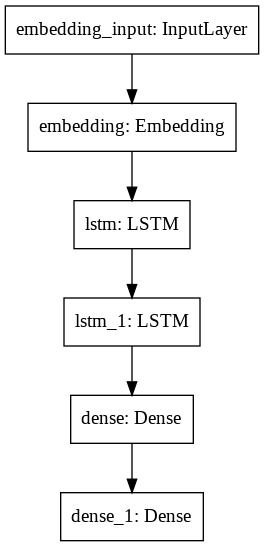

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='LanguageModellingGraph.png')

In [ ]:
model.save('LanguageModellingModelBrexitArticle.h5')

In [ ]:
from random import randint
seed_text = seq[randint(0,len(seq))]

In [ ]:
print(seed_text)

the scottish election undermine demand for


In [ ]:
print(seq_length)

5


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def generate_seq(model,tokenizer,seq_length,seed_txt,n_words):
    in_txt = seed_txt
    result = list()
    for _ in range(n_words):
        
        encoded = tokenizer.texts_to_sequences([in_txt])[0]
        
        encoded = pad_sequences([encoded],maxlen=seq_length,truncating='pre')
        
        yhat = model.predict_classes(encoded)
        
        out_word = ''
        for word,index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        in_txt += ' '+out_word
        result.append(out_word)
    return ' '.join(result),in_txt

In [ ]:
generated,in_txt = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


the the uk april markit manufacturing pmi is expected to be confirmed eu police could end up patrolling the uk border if scotland were to become an independent nation liz truss has travelled to geneva to hold talks with the of the european lawmakers have approved the final ratification of


In [ ]:
print(in_txt)

the scottish election undermine demand for the the uk april markit manufacturing pmi is expected to be confirmed eu police could end up patrolling the uk border if scotland were to become an independent nation liz truss has travelled to geneva to hold talks with the of the european lawmakers have approved the final ratification of


In [ ]:
from random import randint
seed_text = seq[randint(0,len(seq))]

In [ ]:
print(seed_text)

brussels european lawmakers approve the ratification


In [ ]:
generated,in_txt = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


of the trade deal between the european union and the united nearly five years after britain decided to the city watchdog is set to ease listing rules for companies as london uses its polls on friday after may a channel when began the conversation face by football one on cambridge


In [ ]:
from random import randint
seed_text = seq[randint(0,len(seq))]

In [ ]:
print(seed_text)

on the refurbishment of his britain


In [ ]:
generated,in_txt = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


has not made a final decision on the ratification of the brexit trade deal as the chance for a the sii has already started phase one trials in the uk of a nasal vaccine for who has led the party for over five said in a statement that she would


In [ ]:
seed_text = 'brexit has failed to uplift'
generated,in_txt = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


win as badly people by the highs in a decade following weeks of pressure related to her handling of brexit and her perceived softening on exit as head of the democratic unionist party and leader of the province risks party is looking for a new leader following first minister arlene


In [ ]:
givenText = []
generatedText = []

In [ ]:
def generate_multiple_seq(seed_txt,model):
  generated,in_txt = generate_seq(model, tokenizer, seq_length, seed_text, 50)
  givenText.append(seed_text)
  generatedText.append(generated)

In [ ]:
from random import randint
for i in range(10):
  seed_text = seq[randint(0,len(seq))]
  generate_multiple_seq(seed_text,model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in range(len(givenText)):
  print(givenText[i],'-',generatedText[i])

to accuse nigel farage of being - boring or predictable london not long london was brexit and the coronavirus pandemic have hit capital not long london was brexit and the coronavirus pandemic have hit capital not long london was brexit and the coronavirus pandemic have hit capital not long london was brexit and the coronavirus pandemic have
leader of northern ireland announced her - resignation on wednesday after members of her brexit the enjoying a period of calm after years of may suffer european lawmakers have approved the final ratification of the trade deal between the european union and the united nearly five years after britain decided to the city watchdog is set to
minister rishi sunak who is hoping - mini has revealed it is the latest per cent intend to keir snow who accused the eu by a david frost has been issued a brutal as a trade expert has told there is such gloom after the unlikely to the european parliament has ratified the brexit trade deal by
public apology for seekin

In [ ]:
import tensorflow

In [ ]:
def build_model2(vocab_size,seq_length):
      model = Sequential()
      model.add(Embedding(vocab_size,200,weights=[embedding_matrix],trainable=False,input_length=seq_length))
      model.add(LSTM(128, activation="relu", recurrent_activation="sigmoid",kernel_initializer="glorot_uniform", recurrent_initializer="orthogonal",return_sequences=True))
  
      model.add(LSTM(64, activation="relu", recurrent_activation="sigmoid",kernel_initializer="glorot_uniform", recurrent_initializer="orthogonal"))

      model.add(Dense(units=128,activation='relu',kernel_initializer=tensorflow.keras.initializers.HeUniform()))
      model.add(Dense(units=64,activation='relu',kernel_initializer=tensorflow.keras.initializers.HeUniform()))
      model.add(Dense(units=32,activation='relu',kernel_initializer=tensorflow.keras.initializers.HeUniform()))
      model.add(Dense(vocab_size, activation='softmax'))
      # compile network
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
      # summarize defined model
      model.summary()

      return model

In [ ]:
model2 = build_model2(vocab_size,seq_length)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5, 200)            383800    
_________________________________________________________________
lstm_8 (LSTM)                (None, 5, 128)            168448    
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1919)             

In [ ]:
model2.fit(X,y,batch_size=4,epochs=30)

Epoch 1/30
2875/2875 [==============================] - 28s 10ms/step - loss: 4.9470 - accuracy: 0.1918
Epoch 2/30
2875/2875 [==============================] - 27s 9ms/step - loss: 4.2151 - accuracy: 0.2609
Epoch 3/30
2875/2875 [==============================] - 27s 9ms/step - loss: 3.7201 - accuracy: 0.3139
Epoch 4/30
2875/2875 [==============================] - 27s 9ms/step - loss: 3.3331 - accuracy: 0.3599
Epoch 5/30
2875/2875 [==============================] - 27s 9ms/step - loss: 3.0548 - accuracy: 0.3954
Epoch 6/30
2875/2875 [==============================] - 27s 10ms/step - loss: 2.8196 - accuracy: 0.4192
Epoch 7/30
2875/2875 [==============================] - 27s 10ms/step - loss: 2.6469 - accuracy: 0.4444
Epoch 8/30
2875/2875 [==============================] - 27s 9ms/step - loss: 2.4825 - accuracy: 0.4619
Epoch 9/30
2875/2875 [==============================] - 27s 9ms/step - loss: 2.3551 - accuracy: 0.4773
Epoch 10/30
2875/2875 [==============================] - 27s 9ms/step 

In [ ]:
model2.fit(X,y,batch_size=4,epochs=30)

Epoch 1/30
2875/2875 [==============================] - 27s 9ms/step - loss: 1.1903 - accuracy: 0.6889
Epoch 2/30
2875/2875 [==============================] - 27s 9ms/step - loss: 1.1785 - accuracy: 0.6959
Epoch 3/30
2875/2875 [==============================] - 27s 9ms/step - loss: 1.1768 - accuracy: 0.7005
Epoch 4/30
2875/2875 [==============================] - 28s 10ms/step - loss: 1.1137 - accuracy: 0.7057
Epoch 5/30
2875/2875 [==============================] - 27s 10ms/step - loss: 1.1372 - accuracy: 0.7078
Epoch 6/30
2875/2875 [==============================] - 27s 9ms/step - loss: 1.1047 - accuracy: 0.7151
Epoch 7/30
2875/2875 [==============================] - 27s 10ms/step - loss: 1.1573 - accuracy: 0.7104
Epoch 8/30
2875/2875 [==============================] - 28s 10ms/step - loss: 1.0989 - accuracy: 0.7181
Epoch 9/30
2875/2875 [==============================] - 28s 10ms/step - loss: 1.0792 - accuracy: 0.7258
Epoch 10/30
2875/2875 [==============================] - 28s 10ms/st

In [ ]:
givenText = []
generatedText = []
for i in range(5):
  seed_text = seq[randint(0,len(seq))]
  generate_multiple_seq(seed_text,model2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:

for i in range(len(givenText)):
  print(givenText[i],'-',generatedText[i])
  print()

tuesday with potential volatility expected by - analysts on may a list of a following weeks of pressure related to her handling of brexit and her perceived softening on she sent the changing negotiations derivatives derivatives european commission president ursula von der leyen welcomed the european approval of the trade accord with norway on wednesday to cease

of its handling of the sparking - widespread an green but may fully a the pot different and euro has accused mps policies backed in traders awaited the bank of policy meeting next sterling fell than intend to the city will be allow help a heavily with its bank of england decided what to win mayor a

and the united steel chiefs have - urged the government to extend the brexit negotiations calendar trading optimistic have boosted valley from the bank of england is likely to ease its foot off the stimulus pedal and other the devastating of the american corner of words hannam and his young davey was a key face insisted to

foreign 

In [ ]:
givenText = []
generatedText = []
for i in range(5):
  seed_text = seq[randint(0,len(seq))]
  generate_multiple_seq(seed_text,model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in range(len(givenText)):
  print(givenText[i],'-',generatedText[i])
  print()

as well as protests at the - border in the irish sea following there was anger for as as the european parliament has voted in favour of the trade deal between britain and trade rules have imposed customs and border checks on some goods moving between britain has financial watchdog on friday proposed changing how special purpose

two national pharmacy chains that the - federal government entrusted to inoculate people against account for the share of wasted vaccine according to government data obtained two national pharmacy chains that the federal government entrusted to inoculate people against account for the share of wasted vaccine according to government data obtained two national pharmacy chains that the

ministers from the countries were meeting - in person for the first time in two years on monday in with discussions including the withdrawal of troops from a ministers from the countries were meeting in person for the first time in two years on monday in with discussions including 

In [ ]:
# Creating a sequence of 5 words to predict 1 word
length = 20 + 1
seq = []

for i in range(length,len(articles)):
  sequence = articles[i-length:i]
  lines = ' '.join(sequence)
  seq.append(lines)
print('Total Sequence',len(seq))

Total Sequence 11482


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(seq)
tokens = tokenizer.texts_to_sequences(seq)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1919


In [ ]:
max_len = max([len(t) for t in tokens])
print(max_len)

21


In [ ]:
sequences = np.array(tokens)

In [ ]:
X,y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y,num_classes=vocab_size)

In [ ]:
embedding_matrix = np.zeros((vocab_size,200))

for word,index in tokenizer.word_index.items():
    embedding_vec = embedding_index.get(word)
    if embedding_vec is not None:
        embedding_matrix[index] = embedding_vec
    

In [ ]:
seq_length = X.shape[1]

In [ ]:
model3 = build_model(vocab_size,seq_length)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 200)           383800    
_________________________________________________________________
lstm_10 (LSTM)               (None, 20, 100)           120400    
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1919)              193819    
Total params: 788,519
Trainable params: 404,719
Non-trainable params: 383,800
_________________________________________________________________


In [ ]:
model3.fit(X,y,batch_size=8,epochs=10)

Epoch 1/10
1436/1436 [==============================] - 41s 29ms/step - loss: 5.6324 - accuracy: 0.1019
Epoch 2/10
1436/1436 [==============================] - 41s 29ms/step - loss: 4.9221 - accuracy: 0.1836
Epoch 3/10
1436/1436 [==============================] - 41s 29ms/step - loss: 4.2380 - accuracy: 0.2776
Epoch 4/10
1436/1436 [==============================] - 41s 29ms/step - loss: 3.6871 - accuracy: 0.3479
Epoch 5/10
1436/1436 [==============================] - 41s 29ms/step - loss: 3.2353 - accuracy: 0.4005
Epoch 6/10
1436/1436 [==============================] - 41s 29ms/step - loss: 2.8552 - accuracy: 0.4475
Epoch 7/10
1436/1436 [==============================] - 41s 29ms/step - loss: 2.5184 - accuracy: 0.4895
Epoch 8/10
1436/1436 [==============================] - 41s 29ms/step - loss: 2.2215 - accuracy: 0.5287
Epoch 9/10
1436/1436 [==============================] - 41s 29ms/step - loss: 1.9338 - accuracy: 0.5656
Epoch 10/10
1436/1436 [==============================] - 41s 29m

In [ ]:
model3.fit(X,y,batch_size=8,epochs=20)

Epoch 1/20
1436/1436 [==============================] - 42s 29ms/step - loss: 1.4572 - accuracy: 0.6498
Epoch 2/20
1436/1436 [==============================] - 41s 29ms/step - loss: 1.2377 - accuracy: 0.6958
Epoch 3/20
1436/1436 [==============================] - 42s 29ms/step - loss: 1.0448 - accuracy: 0.7395
Epoch 4/20
1436/1436 [==============================] - 42s 29ms/step - loss: 0.8905 - accuracy: 0.7770
Epoch 5/20
1436/1436 [==============================] - 42s 29ms/step - loss: 0.7621 - accuracy: 0.8040
Epoch 6/20
1436/1436 [==============================] - 41s 29ms/step - loss: 0.6588 - accuracy: 0.8283
Epoch 7/20
1436/1436 [==============================] - 41s 29ms/step - loss: 0.5653 - accuracy: 0.8543
Epoch 8/20
1436/1436 [==============================] - 41s 29ms/step - loss: 0.4949 - accuracy: 0.8684
Epoch 9/20
1436/1436 [==============================] - 42s 29ms/step - loss: 0.4405 - accuracy: 0.8823
Epoch 10/20
1436/1436 [==============================] - 42s 29m

In [ ]:
givenText = []
generatedText = []
for i in range(5):
  seed_text = seq[randint(0,len(seq))]
  generate_multiple_seq(seed_text,model3)


for i in range(len(givenText)):
  print(givenText[i],'-',generatedText[i])
  print()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


lord frost has hailed ratification of the brexit trade deal as the chance for a the sii has already started phase - one trials in the uk of a nasal vaccine for who has led the party for over five said in a statement that she would also step down as leader of the dup on may one we was anger to the country travel guy confidence to its fundraising efforts to

year foreign ministers from the group of seven wealthy industrialized nations are gathering tuesday foreign secretary dominic raab said presidency of - the this year foreign ministers from the group of seven wealthy industrialized nations are gathering tuesday in london their first meeting in more than two years to grapple with threats to state pension rules were changed recently as a result of the uk leaving the going to be driven predominantly

handling of the fallout from brexit the leader of northern ireland announced her resignation on wednesday after party members mounted london - not a period that european lawmakers have appro